In [1]:
import numpy as np
import matplotlib.pyplot as plt

Below I have written a function that implements the Euler method. Study it closely and understand how it works

In [2]:
def euler(xs, xe, y0, h, f):
    '''Solves the differential equation dy/dx = f(x); y(xs) = y0 over the interval xs to xe using the Euler method
    with a step size h.
    
    xs: start x value
    xe: end x value
    h: step size
    f: function that returns the derivative
    
    returns:
        xvals: an array of x values
        yvals: a corresponding array of y values
    '''
    
    # Simple sanity checks on the inputs
    if xs > xe: raise ValueError('xs cannot be larger than xe')
       
    # Initialise some things
    nSteps = int((xe-xs)/h)+1
    xVals = np.zeros(nSteps)
    yVals = np.zeros(nSteps)
    
    xVals[0] = xs
    yVals[0] = y0
    
    for i in range(nSteps-1):
        yCurr = yVals[i]
        xCurr = xVals[i]
        
        fval = f(xCurr)
        
        deltay = h*fval
        
        yNext = yCurr + deltay
        xNext = xCurr + h
        
        yVals[i+1] = yNext
        xVals[i+1] = xNext
    return xVals, yVals
    

In the cell below I show how to use this function to solve the differential equation $\frac{dy}{dx} = 2x$, with $y(0)=0$ on the interval $ (0, 2.5)$, using a step size $h=0.5$. The exact solution to this equation is $y = x^2$. I also plot the exact solution and the approximate one. Notice that the Euler method "undershoots" the exact solution.

Experiment by changing the step size and running the cell. **At what step size is the approximate solution very close to the exact one?**

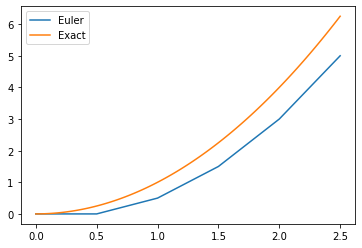

In [3]:
# Step size for which the approximate solution is close to the exact one: 


f1 = lambda x: 2*x
# Note: f1 = lambda x: 2*x is the same as saying
# def f1(x):
#    return 2*x
# For more info: https://www.w3schools.com/python/python_lambda.asp


x, y = euler(0, 2.5, 0, 0.5, f1)
# Note here we could instead write x, y = euler(0, 2.5, 0, 0.5, lambda x: 2*x)

xTrue = np.linspace(0, 2.5, 100)
yTrue = xTrue**2
plt.plot(x, y, xTrue, yTrue)
plt.legend(("Euler", "Exact"))


**By modifying the example above, Write a short bit of code to solve the differential equation $\frac{dy}{dx} = 2x+1$, with y(0) = 0 on the interval  $(0, 2.5)$ using a step size $h=0.5$. Compare the output to the entries you wrote in the table in the first part of the assignment.**

**Now I want you to write a function that implenents the midpoint method. You can copy my code for the euler method (make sure you change the function name) and modify it. You only need to make a small change.**

**Now I want you to make a comparison of the two methods. You should solve the differential equation $\frac{dy}{dx} = -e^x + 14x$ with $y(0) = 0$ on the interval $(0, 6)$. Do this with both the Euler method and the midpoint method (step size $h=1$ in both cases) and then plot a graph showing the exact solution, the approximate solution using the Euler method, and the exact solution using the midpoint method (include legends). Restrict the y range of your plot to \[-50, 75\]**

Note: the exact solution is $y(x) = -e^x + 7x^2$

In [4]:
# Note to compute e^x, you can use numpy.exp(x).

Now we will make another comparison, this time about the convergence of the two methods. By convergence, we mean how quickly the method becomes more accurate with decreasing step size. I'll focus just on the differential equation $\frac{dy}{dx} = \cos{x}$; $y(0) = 0$ on the interval $(0, \pi)$ (the exact solution is $y=x^2$) and the Euler method. I'll use this procedure:
  1. Pick a step size and use the Euler method with that step size to solve the equation.
  2. Compute the *mean squared error* of my approximate solution. The MSE is defined as $\mathrm{MSE} = \sum_{n=0}^N \left(y_{\mathrm{true}}(x_n) - y_{\mathrm{approx}}(x_n)\right)^2$. That is, for each of my x values, I should find the difference between the approximate solution and the exact solution, and then square it. I should add up these squared differences for each of my x values.
  3. Repeat 1-2 with a smaller step size
Then I'll make a plot of MSE vs step size.

Note: I have decided to reduce the step size by a factor of 2 each time. I want to cover a large range of step sizes.

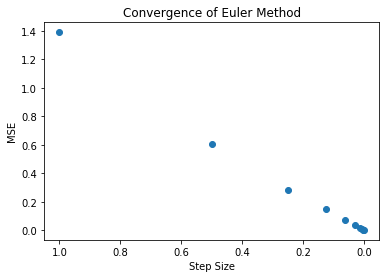

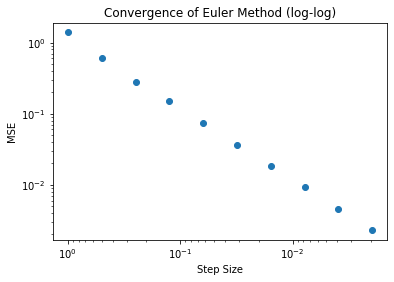

In [17]:
# If you make this larger than about 20, the code will take a very long time to run because the step sizes will get very small.
nStepSizes = 10

errors = np.zeros(nStepSizes)
stepSizes = np.zeros(nStepSizes)

for i in range(nStepSizes):
    if i==0: stepSize = 1
    else: stepSize = stepSizes[i-1] / 2
        
    xApprox, yApprox = euler(0, np.pi, 0, stepSize, lambda x: np.cos(x))
    yExact = np.sin(xApprox)
    MSE = np.sum( (yExact - yApprox)**2)
    errors[i] = MSE
    stepSizes[i] = stepSize
    
plt.plot(stepSizes, errors, 'o')
#This reverses the x axis
plt.gca().invert_xaxis()
plt.xlabel('Step Size')
plt.ylabel('MSE')
plt.title('Convergence of Euler Method')
plt.show()

plt.loglog(stepSizes, errors, 'o')
#This reverses the x axis
plt.gca().invert_xaxis()
plt.xlabel('Step Size')
plt.ylabel('MSE')
plt.title('Convergence of Euler Method (log-log)')
plt.show()

As we expected, the graphs above show that as the step size is reduced the MSE decreases. Note I plotted the second graph with logarithmic axes since the step sizes and MSEs vary over a massive range. 
**Using the second graph, complete the sentence below**

In this situation, if the step size is decreased by 10 times, the MSE decreases by .......

Copy my code from above and add a comparison with the midpoint method. As with my code, you should produce two graphs. Each graph should plot MSE versus Step Size, but both graphs should show this for the Euler method *and* the midpoint method. Include legends on your plots

Based on your second graph, compare the Euler method and the midpoint method. Do they converge at the same rate, or does one converge a little faster, or does one converge a lot faster? With the same step size, do both methods take the same amount of time to run? (you can answer this question without running any code). Which method is better?

*(max 3-5 sentences)*

*Note: some useful phrases might be*
- *With a step size of ... the ... method has an error ..... times smaller than the .... method*
- *Reducing the step size by a factor of 10 reduces the error by .... for the .... method, but only by .... for the ... method*

**Challenges:**
1. Look up the fourth-order runge-kutta method (wikipedia) and write some code to implement it.

